In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
## try lager bottle neck

# 1. load data

df = pd.read_csv('./LID_results/data_ID_results_moredata.csv')
df = df.dropna()
# sort by DM method
df = df.sort_values(by=['DM method'])
df

,Dataset,DM method,Dim,n_sample,n_cluster,Intrinsic Dim (reconstructed),Intrinsic Dim (data),bottleneck_dim
30,blobs_dim3_n5000_y10,DBM_02,3,5000,10,2.3,3.0,2.0
31,blobs_dim10_n5000_y10,DBM_02,10,5000,10,2.2,10.0,2.0
32,blobs_dim30_n5000_y10,DBM_02,30,5000,10,2.1,28.0,2.0
33,blobs_dim100_n5000_y10,DBM_02,100,5000,10,2.0,87.4,2.0
49,blobs_dim3_n5000_y10,DBM_03,3,5000,10,3.0,3.0,3.0
50,blobs_dim10_n5000_y10,DBM_03,10,5000,10,5.0,10.0,3.0
51,blobs_dim30_n5000_y10,DBM_03,30,5000,10,3.0,28.0,3.0
52,blobs_dim100_n5000_y10,DBM_03,100,5000,10,2.5,87.4,3.0
12,blobs_dim10_n5000_y10,DBM_10,10,5000,10,8.7,10.0,10.0
13,blobs_dim30_n5000_y10,DBM_10,30,5000,10,17.8,28.0,10.0


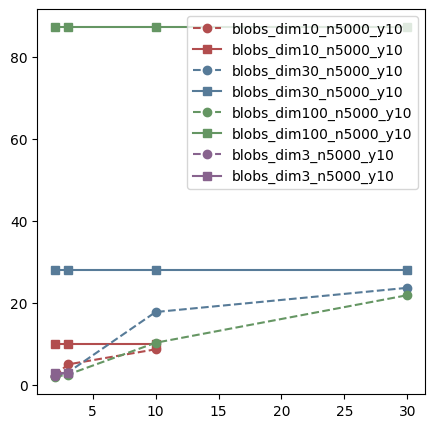

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
colors = sns.color_palette("Set1", n_colors=8, desat=.5)
for i, dataset in enumerate(df['Dataset'].unique()):
    curdf = df[df['Dataset'] == dataset]
    # sort by bottleneck dim
    curdf = curdf.sort_values(by=['bottleneck_dim'])
    ax.plot(curdf['bottleneck_dim'], curdf['Intrinsic Dim (reconstructed)'], '--o', label=dataset, color=colors[i])
    ax.plot(curdf['bottleneck_dim'], curdf['Intrinsic Dim (data)'], '-s', label=dataset, color=colors[i])
ax.legend()

/home/peyote/miniconda3/envs/tf3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peyote/miniconda3/envs/tf3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peyote/miniconda3/envs/tf3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peyote/miniconda3/envs/tf3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

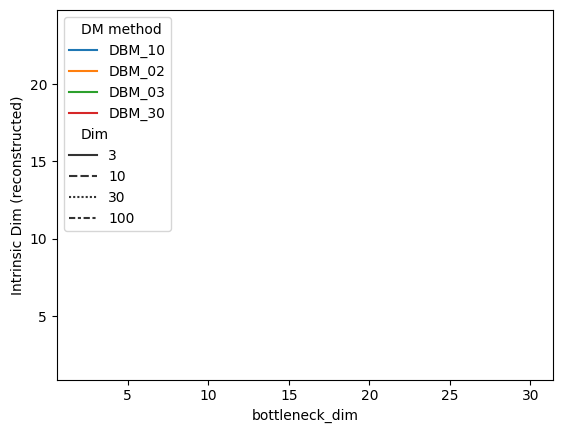

In [4]:
g = sns.lineplot(x='bottleneck_dim', y='Intrinsic Dim (reconstructed)', hue='DM method', style='Dim', data=df)